# 1. Load Date

In [1]:
!pip3 install fuzzywuzzy
!pip3 install langdetect
!pip3 install seaborn

import pandas as pd
import re
from fuzzywuzzy import fuzz
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


/Users/tuesti/Library/Python/3.11/lib/python/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Load csv file and skip initial 5 rows
df_tv = pd.read_csv("TV_JanJul2024.csv", skiprows=5)
df_film = pd.read_csv("Film_JanJul2024.csv", skiprows=5)

# Add new column that identifies the content type (TV/Film)
df_tv['Content Type'] = 'TV'
df_film['Content Type'] = 'Film'

# Merge both dataframe into one
netflix_df = pd.concat([df_tv, df_film], ignore_index=True)

# Drop the first unamed column
netflix_df = netflix_df.drop(['Unnamed: 0'], axis=1)

netflix_df

,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type
0,Fool Me Once: Limited Series,Yes,2024-01-01,"689,500,000",6:25,"107,500,000",TV
1,Bridgerton: Season 3,Yes,2024-05-16,"733,800,000",7:59,"91,900,000",TV
2,Baby Reindeer: Limited Series,Yes,2024-04-11,"347,600,000",3:58,"87,600,000",TV
3,The Gentlemen: Season 1,Yes,2024-03-07,"507,300,000",6:41,"75,900,000",TV
4,Avatar The Last Airbender: Season 1,Yes,2024-02-22,"515,300,000",7:15,"71,100,000",TV
...,...,...,...,...,...,...,...
16156,أصحاب ...ولا أعزّ,No,2022-01-20,"100,000",1:40,"100,000",Film
16157,두근두근 내 인생,No,NaN,"100,000",1:52,"100,000",Film
16158,레드슈즈,No,NaN,"100,000",1:32,"100,000",Film
16159,아이 캔 스피크,No,NaN,"100,000",1:59,"100,000",Film


In [3]:
netflix_df["Hours Viewed"].replace(",", "", inplace=True, regex=True)
netflix_df["Hours Viewed"] = netflix_df["Hours Viewed"].astype(int)
netflix_df["Views"].replace(",", "", inplace=True, regex=True)
netflix_df["Views"] = netflix_df["Views"].astype(int)

/var/folders/dt/npwm56kx383b7_d7m4gcvwch0000gn/T/ipykernel_75590/1173856444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_df["Hours Viewed"].replace(",", "", inplace=True, regex=True)
/var/folders/dt/npwm56kx383b7_d7m4gcvwch0000gn/T/ipykernel_75590/1173856444.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

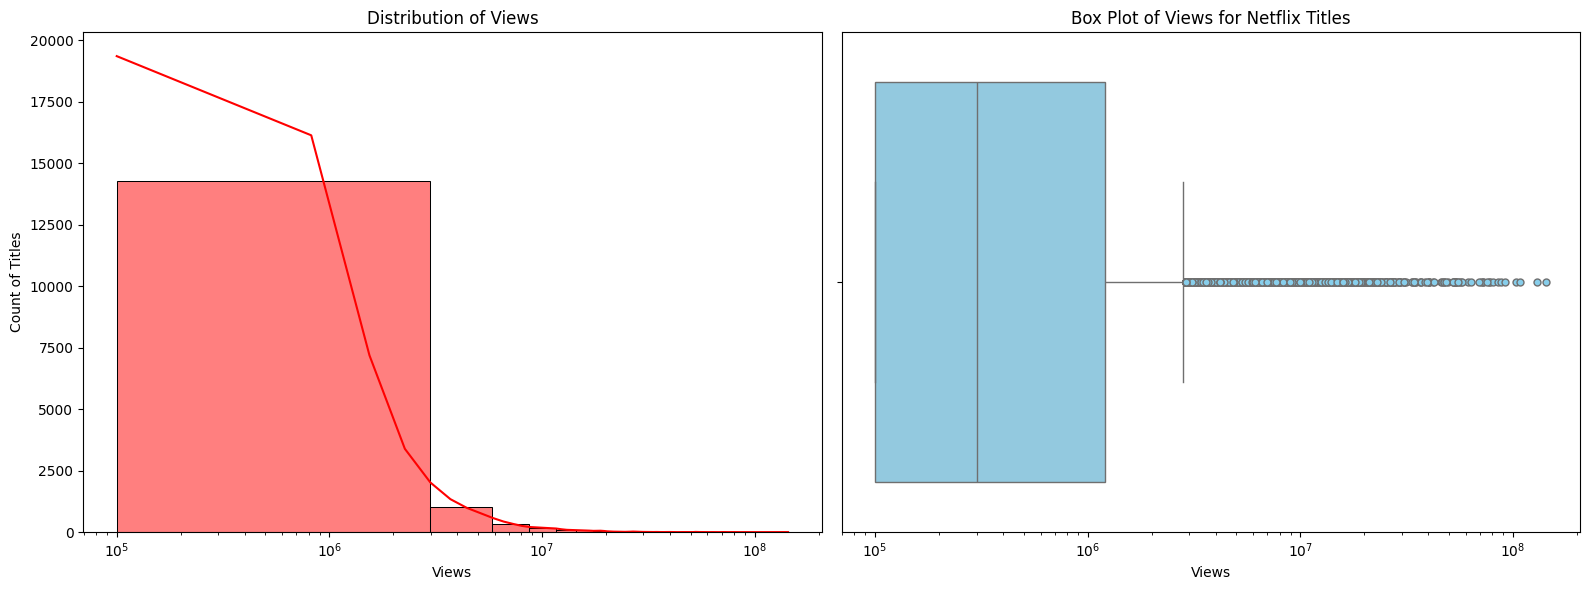

In [41]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram 
sns.histplot(netflix_df['Views'], bins=50, kde=True, color='red', ax=axes[0])
axes[0].set_title('Distribution of Views')
axes[0].set_xlabel('Views')
axes[0].set_ylabel('Count of Titles')
axes[0].set_xscale('log')  # Logarithmic scale for wide distribution

# Box plot 
flierprops = dict(marker='o', markerfacecolor='skyblue', markersize=5)
sns.boxplot(x=netflix_df["Views"],color='skyblue', flierprops=flierprops, ax=axes[1])
axes[1].set_title("Box Plot of Views for Netflix Titles")
axes[1].set_xlabel("Views")
axes[1].set_xscale('log')  # Logarithmic scale for wide distribution

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Key Observations:
The logarithmic x-axis compresses the range of views valyes, making both graphs easier to read.

- **Histogram**: Most titles are concentrated in the lower view count range, with few titles having extremely high views (Netflix's biggest hits). Demonstrates a right-skewed distribution.
- **Box Plot**: Outliers illustrated in the box plot are the platform's biggest hits, highlights the variability in viewership across Netflix titles.

In [8]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                16161 non-null  object
 1   Available Globally?  16161 non-null  object
 2   Release Date         5069 non-null   object
 3   Hours Viewed         16161 non-null  int64 
 4   Runtime              16161 non-null  object
 5   Views                16161 non-null  int64 
 6   Content Type         16161 non-null  object
dtypes: int64(2), object(5)
memory usage: 883.9+ KB


In [9]:
netflix_df['Release Date'] = pd.to_datetime(netflix_df['Release Date'], errors='coerce')

## Sort rows by Content Type to group entries by type, and then sort by Title to group 
netflix_df.sort_values(by=['Content Type', 'Title'], inplace=True)

In [10]:
def update_title_and_extract_secondary_title(title):
    match = re.search(r'\s//\s(.*)', title)
    if match:
        season_num = match.group(1)
        cleaned_title = re.sub(r'\s//\s(.*)','', title)
        return cleaned_title, match.group(1)
    else:
        return title, pd.NA

netflix_df[['Title','Secondary Title']]= netflix_df['Title'].apply(update_title_and_extract_secondary_title).apply(pd.Series)
netflix_df[netflix_df['Secondary Title'].notna()].head()

,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Secondary Title
7591,#Alive,Yes,2020-09-08,7100000,1:38,4300000,Film,#살아있다
12739,#FriendButMarried,No,NaT,200000,1:42,100000,Film,#TemanTapiMenikah
12740,#FriendButMarried 2,No,NaT,200000,1:44,100000,Film,#TemanTapiMenikah 2
11973,#Manhole,No,NaT,300000,1:40,200000,Film,#マンホール
9477,(Ab)normal Desire,No,NaT,1800000,2:14,800000,Film,正欲


In [11]:
originals_df = pd.read_csv('NetflixOriginalsReleaseDatesNA.csv')
originals_df

,Title,Season,Genres,Language,Release Date,Content Type
0,Stranger Things,ALL,"Horror,Science Fiction",English,2016-07-15,TV
1,Virgin River,ALL,"Drama,Romance",English,2019-12-06,TV
2,The Witcher,ALL,"Fantasy,Drama",English,2019-12-20,TV
3,Outer Banks,ALL,"Drama,Teen",English,2020-04-15,TV
4,Sweet Magnolias,ALL,"Drama,Romance",English,2020-05-19,TV
...,...,...,...,...,...,...
3593,Lucifer,4,"Fantasy,Crime",English,2019-05-08,TV
3594,Lucifer,5,"Fantasy,Crime",English,NaN,TV
3595,Lucifer,6,"Fantasy,Crime",English,NaN,TV
3596,Power Rangers,29,"Action,Science Fiction",English,2022-03-03,TV


In [12]:
def normalize_title(title):
    # Replace apostrophe variations with standard '
    title = re.sub(r"[’‘′]", "'", title)
    # Replace dashes with a standard -
    title = re.sub(r"[–—−]", "-", title)
    # Replace multiple spaces with a single space and strip any trailing spaces
    title = re.sub(r"\s+", " ", title).strip()
    return title

# Apply enhanced normalization function to simplify titles in both DataFrames
netflix_df['Title'] = netflix_df['Title'].apply(normalize_title)
originals_df['Title'] = originals_df['Title'].apply(normalize_title)


## Creating a new 'Season' column
Using newly created method `extract_season(title)` that leverages `re.search()` to find titles with 'Season', 'Series', or 'Part' followed by a number. If matched, it will return the season number, and if it doesn't it will return NA. This data will be stored in a newly created column `Season`

In [13]:
multi_season_keywords = set()

def extract_season(row):
    title = row['Title']
    content_type = row['Content Type']
    if content_type == 'TV':
        match = re.search(r'(.*):\s(\w+)\s(\d{1,2})', title)
        if match:
            multi_season_keywords.add(match.group(2))

# Apply the function row-wise
netflix_df.apply(extract_season, axis=1)

print(multi_season_keywords)

{'Part', 'Series', 'Staffel', 'Chapter', 'Our', 'Toritori', 'Temporada', 'Beyond', 'season', 'Chapters', 'Season', 'New', 'Volume', 'The', 'Saison', 'Collection', 'Book'}


In [14]:
multi_season_keywords = ['Season','Collection','season','Chapter','Volume','Vol.','Temporada','Book','Collection','Series','Saison','Staffel','Part']

In [15]:

netflix_df[(netflix_df['Content Type'] == 'TV') & (netflix_df['Title'].str.contains(r'^(?P<title>.*?):\sPart\s(?P<roman>I{1,3}|ll|l)'))].head(3)

/var/folders/dt/npwm56kx383b7_d7m4gcvwch0000gn/T/ipykernel_75590/3814141070.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_df[(netflix_df['Content Type'] == 'TV') & (netflix_df['Title'].str.contains(r'^(?P<title>.*?):\sPart\s(?P<roman>I{1,3}|ll|l)'))].head(3)


,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Secondary Title
1098,KENGAN ASHURA: Part l,Yes,2019-07-31,10900000,5:04,2200000,TV,ケンガンアシュラ: シーズン1: パートI
1286,KENGAN ASHURA: Part ll,Yes,2019-10-31,9200000,4:58,1900000,TV,ケンガンアシュラ: シーズン1: パートII
3029,SAINT SEIYA: Knights of the Zodiac: Part I,Yes,2019-07-19,1400000,2:22,600000,TV,<NA>


In [16]:

netflix_df[(netflix_df['Content Type'] == 'TV') & (netflix_df['Title'].str.contains('^(.*)\s(\d{1,2})?(I{1,3})?$'))].head()

/var/folders/dt/npwm56kx383b7_d7m4gcvwch0000gn/T/ipykernel_75590/2162487752.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_df[(netflix_df['Content Type'] == 'TV') & (netflix_df['Title'].str.contains('^(.*)\s(\d{1,2})?(I{1,3})?$'))].head()


,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Secondary Title
3525,#NoFilter: Season 1,Yes,2023-02-15,2300000,5:40,400000,TV,Sem Filtro: Season 1
5743,#blackAF: Season 1,Yes,2020-04-17,600000,4:58,100000,TV,<NA>
4820,(Un)Well: Season 1,No,2020-08-12,800000,5:17,200000,TV,<NA>
3890,10 count to the Future: Season 1,No,NaT,2400000,7:47,300000,TV,未来への10カウント: シーズン1
4055,100 Days to Indy: Season 1,No,NaT,1300000,4:14,300000,TV,<NA>


In [17]:
netflix_df['Season'] = pd.NA

# Apply the function to each row
def process_row(row, multi_season_keywords):
    if row['Content Type'] != 'TV':
        match = re.search(r'(.*)\s\((\d{4})\)', row['Title'])
        if not match:
            return row['Title'], pd.NA, row['Release Date']
    
    title = str(row['Title'])
    
    # Patterns to match titles with season and part information and clean them
    patterns = [ 
        # This pattern captures the title, year, season number, and optional "Part" information 
        (r'^(?P<title>.*?)(?:\s\((?P<year>\d{4})\))?:\s(?P<segment>\w+)\s(?P<season>\d+)(?:[:\s]?\(?((Part|Volume)\s(?P<part>\d{1,2}))?\)?)?(.*)?', r'(?:\s\((?P<year>\d{4})\))?:\s(?P<segment>\w+)\s(?P<season>\d+)(?:[:\s]?\(?((Part|Volume)\s(?P<part>\d{1,2}))?\)?)?(.*)?'),
        # General pattern to handle just "Season" or "Series"
        (r'^(?P<title>.*?)(?:\s\((?P<year>\d{4})\))?[-:]\s(?P<segment>\w+(.)?)\s(?P<season>\d{1,2})$', r'(?:\s\((?P<year>\d{4})\))?[:-]\s(?P<segment>\w+(.)?)\s\d{1,2}'),
        # Pattern to handle "Part" with Roman numerals
        (r'^(?P<title>.*?):\sPart\s(?P<roman>I{1,3}|ll|l|IV)', r':\sPart\s(?P<roman>I{1,3}|ll|l)'),
        (r'^(.*):\sCollection(\s(?P<season>\d+))?', r':\sCollection(\s?P<season>\d+(.*)?)?'),
        # Handle titles with "limited series"
        (r'^.*?:(?P<limited>\sLimited\sSeries)',r':\sLimited\sSeries'),
        # Handle two titles with 'final season'  
        (r'^(?P<title>.*):\s(The\s)?(?P<final>Final Season)',r':\s(The\s)?(?P<final>Final Season)(.*)?'),
        # Handle titles with year
        (r'(?P<title>.*)\s\((?P<year>\d{4})\)',r'\s\((\d{4})\)')
    ]
    
    # Roman numeral to integer mapping
    roman_to_int = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'll': 2, 'l': 1}
    
    for pattern, clean_pattern in patterns:
        match = re.search(pattern, title)

        season_num = row['Season']
        
        if match:
            cleaned_title = re.sub(clean_pattern, '', title).strip()
            # Check if the captured segment is in the list of multi_season_keywords
            if 'segment' in match.groupdict() and match.group('segment') in multi_season_keywords:
                # Extract season number
                season_num = int(match.group('season')) if 'season' in match.groupdict() and match.group('season') else pd.NA

            elif 'roman' in match.groupdict() and match.group('roman'):
                season_num = int(roman_to_int.get(match.group('roman')))
            
            # Can update to give titles with collection in the title, a 1 for season
            elif 'season' in match.groupdict() and match.group('season'):
                season_num = int(match.group('season'))
            
            elif 'limited' in match.groupdict() and match.group('limited'):
                season_num = 1
            
            elif 'final' in match.groupdict() and match.group('final'):
                if match.group('title') == 'Attack on Titan':
                    season_num = 4
                if match.group('title') == 'Cable Girls':
                    season_num = 5

            # Extract and handle the year if present
            year = match.group('year') if 'year' in match.groupdict() else None
            date = pd.to_datetime(year, format='%Y') if year else row['Release Date']
                
            return cleaned_title, season_num, date

    # Default return if no match found
    return title.strip(), pd.NA, row['Release Date']


# Using lambda to avoid TypeErrors due to incorrect data types
netflix_df['Title'], netflix_df['Season'], netflix_df['Release Date'] = zip(*netflix_df.apply(lambda row: process_row(row, multi_season_keywords), axis=1))

In [18]:
# Pull main title and count occurences of each to identify multi-season shows
first_season_titles = []

# Pull main title and count occurences of each to identify multi-season shows of the remaining titles
def multi_season_titles(row):
    title = row['Title']
    season_num = row['Season']
    if pd.isna(season_num) and row['Content Type'] == 'TV':

        patterns = [r'^(?P<main_title>.*)\s(?P<season>(\d{1,2}|))$',
                    r'^(?P<main_title>.*)\s(?P<roman>I{1,3}|ll|l|IV)$']
        
        for pattern in patterns:
            match = re.search(pattern, title)
            if match:
                main_title = match.group('main_title')
                if 'season' in match.groupdict() and match.group('season'):
                    if main_title in netflix_df[netflix_df['Season'].isna()]['Title'].to_list():
                    
                        first_season_titles.append(main_title)
                        season_num = int(match.group('season'))

                        return main_title, season_num
                    
                    alternative = main_title + ' 1'
                    if alternative in netflix_df[netflix_df['Season'].isna()]['Title'].to_list():
                        season_num = int(match.group('season'))
                        return main_title, season_num                

                if 'roman' in match.groupdict() and match.group('roman'):
                    roman_to_int = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'll': 2, 'l': 1}  
                    season_num = int(roman_to_int.get(match.group('roman')))

                    first_season_titles.append(main_title)
                    return main_title, season_num

    return title, season_num            

# Update `Season` column for first season titles in `netflix_df`
def first_season(row, first_season_titles):
    title = row['Title']
    season_num = row['Season']
    if row['Content Type'] == 'TV' and title in first_season_titles and pd.isna(season_num):
        return 1
    return season_num

netflix_df[['Title','Season']]= netflix_df.apply(multi_season_titles, axis = 1).apply(pd.Series)
netflix_df['Season'] = netflix_df.apply(lambda row: first_season(row, first_season_titles), axis=1)

In [19]:
netflix_df

,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Secondary Title,Season
13856,"""Sr.""",Yes,2022-12-02,100000,1:29,100000,Film,<NA>,<NA>
7591,#Alive,Yes,2020-09-08,7100000,1:38,4300000,Film,#살아있다,<NA>
12739,#FriendButMarried,No,NaT,200000,1:42,100000,Film,#TemanTapiMenikah,<NA>
12740,#FriendButMarried 2,No,NaT,200000,1:44,100000,Film,#TemanTapiMenikah 2,<NA>
11973,#Manhole,No,NaT,300000,1:40,200000,Film,#マンホール,<NA>
...,...,...,...,...,...,...,...,...,...
3706,Ślub Doskonały,No,NaT,900000,2:16,400000,TV,<NA>,1
6005,تحت الوصاية,No,NaT,500000,9:00,100000,TV,<NA>,1
1153,​Carol & The End of The World,Yes,2023-12-15,10000000,4:51,2100000,TV,<NA>,1
2696,【OSHI NO KO】,No,NaT,3600000,5:26,700000,TV,【推しの子】: 第1期,1


In [20]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16161 entries, 13856 to 5330
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                16161 non-null  object        
 1   Available Globally?  16161 non-null  object        
 2   Release Date         6668 non-null   datetime64[ns]
 3   Hours Viewed         16161 non-null  int64         
 4   Runtime              16161 non-null  object        
 5   Views                16161 non-null  int64         
 6   Content Type         16161 non-null  object        
 7   Secondary Title      5616 non-null   object        
 8   Season               5967 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.2+ MB


In [21]:
originals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3598 non-null   object
 1   Season        3598 non-null   object
 2   Genres        3598 non-null   object
 3   Language      3598 non-null   object
 4   Release Date  3534 non-null   object
 5   Content Type  3598 non-null   object
dtypes: object(6)
memory usage: 168.8+ KB


## Dataframe matching time

### Film matching

In [22]:
# Convert dataframe columns to date time type
netflix_df['Release Date'] = pd.to_datetime(netflix_df['Release Date'], errors='coerce')
originals_df['Release Date'] = pd.to_datetime(originals_df['Release Date'], errors='coerce')

!pip3 install unidecode
from unidecode import unidecode

def process_title(title):
    normalized_title = unidecode(title)
    shortened_title = re.sub(r':.*', '', normalized_title).strip()  # Shortens titles, removing everything after the last colon
    cleaned_title = re.sub(r'[-_]', ' ', normalized_title).strip()  # Replaces '-' or '_' with a space
    cleaned_title = re.sub(r'[^\w\s]', '', cleaned_title).strip()  # Removes all punctuation except words and spaces

    # Only return a different title if the shortened or cleaned version is different from the original
    shortened_title = pd.NA if normalized_title == shortened_title else shortened_title.lower()
    cleaned_title = pd.NA if normalized_title == cleaned_title else cleaned_title.lower()
  
    return normalized_title,shortened_title, cleaned_title

originals = originals_df.copy()
netflix_report = netflix_df.copy()

originals[['Title','Shortened Title','Cleaned Title']] = originals['Title'].apply(process_title).apply(pd.Series)
netflix_report[['Title','Shortened Title','Cleaned Title']] = netflix_report['Title'].apply(process_title).apply(pd.Series)

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [23]:
film_originals = originals[originals['Content Type'] == 'Film']

# Step 2: Check for duplicates in the Title and Release Date columns
duplicate_titles = film_originals[film_originals[['Title', 'Release Date']].duplicated(keep=False)]

# Display the duplicate titles
duplicate_titles

,Title,Season,Genres,Language,Release Date,Content Type,Shortened Title,Cleaned Title


In [24]:
tv_originals = originals[originals['Content Type'] == 'TV']

# Step 2: Check for duplicates in the Title and Season columns
duplicate_titles = tv_originals[tv_originals[['Title', 'Release Date','Season']].duplicated(keep=False)]

# Display the duplicate titles
duplicate_titles

,Title,Season,Genres,Language,Release Date,Content Type,Shortened Title,Cleaned Title


In [25]:
netflix_report['Netflix Original?'] = 'No'
netflix_report['Genres'] = pd.NA
netflix_report['Language'] = pd.NA

matched_films = set()
matched_tv = set()

def match_film_originals(row, film_originals):
    title = row['Title'].lower()
    date = row['Release Date']
    short = row['Shortened Title'].lower() if pd.notna(row['Shortened Title']) else None
    clean = row['Cleaned Title'].lower() if pd.notna(row['Cleaned Title']) else None



    match_patterns = [film_originals[film_originals['Title'].str.lower() == title],
                      film_originals[film_originals['Title'].str.lower() == clean] if pd.notna(clean) else pd.DataFrame(), 
                        film_originals[film_originals['Cleaned Title'] == title],
                        film_originals[film_originals['Cleaned Title'].str.lower() == clean] if pd.notna(clean) else pd.DataFrame(),
                        film_originals[film_originals['Shortened Title'].str.lower() == title],
                        film_originals[film_originals['Shortened Title'].str.lower() == short] if pd.notna(short) else pd.DataFrame(),
]
        
    for i,pattern in enumerate(match_patterns):
        match = pattern
        if not match.empty:
            matched_row = match[abs((match['Release Date'] - date).dt.days) <= 2]
            if not matched_row.empty:
                    matched_films.add((matched_row.iloc[0]['Title'], matched_row.iloc[0]['Release Date']))
                    return 'Yes', matched_row.iloc[0]['Genres'], matched_row.iloc[0]['Language']
    
    # If title is a direct match, as well as Release Date column, but found in the `tv_originals`
    if row['Content Type'] == 'Film':

        match_patterns = [tv_originals[tv_originals['Title'].str.lower() == title],
                          tv_originals[tv_originals['Shortened Title'].str.lower() == title],
                          tv_originals[tv_originals['Cleaned Title'].str.lower() == title]]

        for pattern in match_patterns:
            match = pattern
            if not match.empty:
                matched_row = match[abs((match['Release Date'] - date).dt.days) <= 2]
                if not matched_row.empty:
                    matched_tv.add((matched_row.iloc[0]['Title'], matched_row.iloc[0]['Release Date']))
                    return 'Yes', matched_row.iloc[0]['Genres'], matched_row.iloc[0]['Language']
    
    return row['Netflix Original?'], row['Genres'], row['Language']        
    
netflix_report[['Netflix Original?','Genres', 'Language']] = netflix_report.apply(lambda row: match_film_originals(row, film_originals), axis = 1).apply(pd.Series)


KeyboardInterrupt: 

In [ ]:
# Function to check if a row is in the matched films and remove it from the set
def filter_and_remove_matched(row, matched_set):
    match_tuple = (row['Title'], row['Release Date'])

    # If the film is in the matched_films set, remove it
    if match_tuple in matched_set:
        matched_set.remove(match_tuple)  
        return False  
    return True  # To keep this row 


print(f"Titles in 'film_originals' before matching: {len(film_originals)}")

# Apply the filter function to exclude matched titles and remove from set
film_originals = film_originals[film_originals.apply(lambda row: filter_and_remove_matched(row, matched_films), axis=1)]

print(f"Remaining titles in 'film_originals': {len(film_originals)}\n")
if len(matched_films)==0:
    print(f"All matched titles removed from 'film_originals'\n")
else:
    print("There are still matched titles that were not removed from 'film_originals'\n")


print(f"Titles in 'tv_originals' before matching: {len(tv_originals)}")
tv_originals = tv_originals[tv_originals.apply(lambda row: filter_and_remove_matched(row, matched_tv), axis=1)]

print(f"Remaining titles in 'tv_originals': {len(tv_originals)}\n")
if len(matched_tv)==0:
    print(f"All matched titles removed from 'tv_originals'")
else:
    print("There are still matched titles that were not removed from 'tv_originals'")

Titles in 'film_originals' before matching: 1188
Remaining titles in 'film_originals': 166

All matched titles removed from 'film_originals'

Titles in 'tv_originals' before matching: 2410
Remaining titles in 'tv_originals': 2329

All matched titles removed from 'tv_originals'


In [ ]:
film_originals

,Title,Season,Genres,Language,Release Date,Content Type,Shortened Title,Cleaned Title
1899,Brahman Naman,ALL,Comedy,English,2016-07-07,Film,<NA>,<NA>
1915,Imperial Dreams,ALL,Drama,English,2017-02-03,Film,<NA>,<NA>
1916,Girlfriend's Day,ALL,"Comedy,Drama",English,2017-02-14,Film,<NA>,girlfriends day
1947,My Own Man,ALL,Documentary,English,2015-03-06,Film,<NA>,<NA>
1963,Sky Ladder: The Art of Cai Guo-Qiang,ALL,Documentary,Mandarin,2016-10-14,Film,sky ladder,sky ladder the art of cai guo qiang
...,...,...,...,...,...,...,...,...
3071,Untold: Sign Stealer,ALL,Documentary,English,2024-08-27,Film,untold,untold sign stealer
3072,Untold: Hope Solo vs. U.S. Soccer,ALL,Documentary,English,2024-09-03,Film,untold,untold hope solo vs us soccer
3073,Apollo 13: Survival,ALL,Documentary,English,2024-09-05,Film,apollo 13,apollo 13 survival
3079,Rebel Moon - Chapter One: Chalice of Blood,ALL,Specials,English,2024-08-02,Film,rebel moon - chapter one,rebel moon chapter one chalice of blood


- After taking a closer look, titles like 'Braham Naman' and 'Imperial Dreams' were released on Netflix and later removed from the platform. Now that we know that, there will be entries that cannot be matched to `netflix_df`
- Other titles like 'Untold: Crime & Penalties' are in `netflix_df` but aren't matched because of a missing character.
- Now working towards highlighting only titles that have the shortened title in the netflix_df

In [ ]:
# Loop through film_originals to find and update matches in netflix_report
for i, row in film_originals.iterrows():
    matched_index = -1

    match_patterns = [netflix_report[netflix_report['Shortened Title'] == row['Shortened Title']],
                      netflix_report[netflix_report['Cleaned Title'] == row['Cleaned Title']]]

    for pattern in match_patterns:
        match = pattern
        if not match.empty:
            matched_row = match[abs((match['Release Date'] - row['Release Date']).dt.days) <= 2]
            if not matched_row.empty:
                matched_films.add((row['Title'], row['Release Date']))
    
    match = netflix_report[netflix_report['Title'] == row['Title']]
    if not match.empty:
        matched_index = match.index
    
    match = re.search(r'^(?P<title>.*)\s\w+\s\d{1,2}$', row['Title'])
    if match:
            franchise_title = match.group('title').strip()
            match = netflix_df[netflix_df['Title'].str.strip().str.contains(franchise_title)]
            if not match.empty:
                  matched_row = match[abs((match['Release Date'] - row['Release Date']).dt.days) <= 2]
                  if not matched_row.empty:
                    matched_index = matched_row.index
                 
    if matched_index >= 0:
        # Update specific columns in netflix_report with additional information
        netflix_report.loc[matched_index, 'Netflix Original?'] = 'Yes'
        netflix_report.loc[matched_index, 'Genres'] = row['Genres']
        netflix_report.loc[matched_index, 'Language'] = row['Language']

        matched_films.add((row['Title'],row['Release Date']))
        

In [ ]:
matched_films

{('How I Fell in Love with a Gangster', Timestamp('2022-01-12 00:00:00')),
 ('Nobody Sleeps in the Woods Tonight', Timestamp('2020-10-28 00:00:00')),
 ('Nobody Sleeps in the Woods Tonight Part 2',
  Timestamp('2021-10-27 00:00:00')),
 ('The Price of Family', Timestamp('2023-01-25 00:00:00')),
 ('To All the Boys: Always and Forever - The Afterparty',
  Timestamp('2021-02-13 00:00:00'))}

In [ ]:
print(f"Titles in 'film_originals' before matching: {len(film_originals)}")

# Function to check if a row is in the matched films and remove it from the set
def filter_and_remove_matched(row):
    match_tuple = (row['Title'], row['Release Date'])

    # If the film is in the matched_films set, remove it
    if match_tuple in matched_films:
        matched_films.remove(match_tuple)  
        return False  
    return True  # To keep this row 

# Apply the filter function to exclude matched titles and remove from set
film_originals = film_originals[film_originals.apply(filter_and_remove_matched, axis=1)]

print(f"Remaining titles in 'film_originals': {len(film_originals)}\n")


Titles in 'film_originals' before matching: 166
Remaining titles in 'film_originals': 161



In [ ]:
matched_films = set()

def match_film_originals(row, film_originals):
    title = row['Title'].lower()
    date = row['Release Date']

    if row['Netflix Original?'] == 'No': 
        match = film_originals[abs(film_originals['Release Date'] - date).dt.days <= 3]
            
        for _, match_row in match.iterrows():
            # Compare `title` with each matching row's title
            match_title = match_row['Title'].lower()
                        
            # Calculate similarity
            similarity_ratio = fuzz.token_set_ratio(title, match_title)
            if similarity_ratio >= 80:
                matched_films.add((match_row['Title'], match_row['Release Date']))
                return 'Yes', match_row['Genres'], match_row['Language']
        
   
    return row['Netflix Original?'], row['Genres'], row['Language']
    
netflix_report[['Netflix Original?','Genres', 'Language']] = netflix_report.apply(lambda row: match_film_originals(row, film_originals), axis = 1).apply(pd.Series)



### TV Show Matching

In [ ]:
tv_originals

,Title,Season,Genres,Language,Release Date,Content Type,Shortened Title,Cleaned Title
0,Stranger Things,ALL,"Horror,Science Fiction",English,2016-07-15,TV,<NA>,<NA>
1,Virgin River,ALL,"Drama,Romance",English,2019-12-06,TV,<NA>,<NA>
2,The Witcher,ALL,"Fantasy,Drama",English,2019-12-20,TV,<NA>,<NA>
3,Outer Banks,ALL,"Drama,Teen",English,2020-04-15,TV,<NA>,<NA>
4,Sweet Magnolias,ALL,"Drama,Romance",English,2020-05-19,TV,<NA>,<NA>
...,...,...,...,...,...,...,...,...
3593,Lucifer,4,"Fantasy,Crime",English,2019-05-08,TV,<NA>,<NA>
3594,Lucifer,5,"Fantasy,Crime",English,NaT,TV,<NA>,<NA>
3595,Lucifer,6,"Fantasy,Crime",English,NaT,TV,<NA>,<NA>
3596,Power Rangers,29,"Action,Science Fiction",English,2022-03-03,TV,<NA>,<NA>


In [ ]:
tv_originals_complete = tv_originals[(tv_originals['Season'] =='ALL') ]

# Check for duplicates in the Title and Season columns
duplicate_titles = tv_originals_complete[tv_originals_complete[['Title']].duplicated(keep=False)]

# Display the duplicate titles
duplicate_titles

,Title,Season,Genres,Language,Release Date,Content Type,Shortened Title,Cleaned Title
130,The Influencer,ALL,Drama,Spanish,2023-12-13,TV,<NA>,<NA>
260,The Influencer,ALL,Reality,Korean,2024-08-06,TV,<NA>,<NA>
956,The Chosen One,ALL,"Drama,Thriller",Portuguese,2019-06-28,TV,<NA>,<NA>
995,The Club,ALL,"Drama,Crime",Spanish,2019-11-15,TV,<NA>,<NA>
1052,The Chosen One,ALL,"Fantasy,Drama",Spanish,2023-08-16,TV,<NA>,<NA>
1084,The Club,ALL,"History,Drama",Turkish,2021-11-05,TV,<NA>,<NA>


In [ ]:
# 2/3 duplicate titles only have one season each, so we can match them to the `tv_originals_complete` using the Title and Release Date columns
# `The Club` has one season and then two seasons, so the best way to match them is using the Title column and a language detection library on the 'Secondary Title' column 
duplicate_titles = duplicate_titles['Title'].str.lower().to_list()
netflix_report[netflix_report['Title'].str.contains('(The Influencer|The Chosen One|The Club)')]

/var/folders/dt/npwm56kx383b7_d7m4gcvwch0000gn/T/ipykernel_51565/3697398285.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_report[netflix_report['Title'].str.contains('(The Influencer|The Chosen One|The Club)')]


,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Secondary Title,Season,Shortened Title,Cleaned Title,Netflix Original?,Genres,Language
2734,The Chosen One,Yes,2023-08-16,3100000,4:19,"700,000",TV,El Elegido: Temporada 1,1,<NA>,<NA>,No,<NA>,<NA>
6166,The Chosen One,Yes,2019-06-28,400000,4:33,"100,000",TV,O Escolhido: Temporada 1,1,<NA>,<NA>,No,<NA>,<NA>
3796,The Club,Yes,2019-11-15,4700000,13:57,"300,000",TV,El club: Temporada 1,1,<NA>,<NA>,No,<NA>,<NA>
3847,The Club,Yes,2021-11-05,2900000,8:19,"300,000",TV,Kulüp: 1. Sezon,1,<NA>,<NA>,No,<NA>,<NA>
3866,The Club,Yes,2023-09-15,2700000,7:55,"300,000",TV,Kulüp: 2. Sezon,2,<NA>,<NA>,No,<NA>,<NA>
1306,The Influencer,Yes,2023-12-13,85100000,46:21,"1,800,000",TV,La influencer: Temporada 1,1,<NA>,<NA>,No,<NA>,<NA>


In [ ]:
duplicate_titles2 = netflix_report[
    (netflix_report['Content Type'] == 'TV') &
    (netflix_report['Season'] == 1) &
    pd.notna(netflix_report['Release Date']) &
    # Exclude the titles found in `duplicate_titles`
    (~netflix_report['Title'].isin(duplicate_titles))&
    # Keep titles found in `tv_originals_complete`
    (netflix_report['Title'].isin(tv_originals_complete['Title']) |
     netflix_report['Title'].isin(tv_originals_complete['Shortened Title'])
     )
]

# Check for duplicates within this filtered set
duplicate_titles2 = duplicate_titles2[duplicate_titles2['Title'].duplicated(keep=False)]

# Display the resulting duplicate titles
duplicate_titles2

,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Secondary Title,Season,Shortened Title,Cleaned Title,Netflix Original?,Genres,Language
5456,Glitch,Yes,2022-10-07,1100000,9:04,"100,000",TV,글리치: 리미티드 시리즈,1,<NA>,<NA>,No,<NA>,<NA>
944,Glitch,Yes,2016-10-14,13000000,5:18,"2,500,000",TV,<NA>,1,<NA>,<NA>,No,<NA>,<NA>
2319,Johnny Test,No,2005-01-01,4100000,4:29,"900,000",TV,<NA>,1,<NA>,<NA>,No,<NA>,<NA>
2949,Johnny Test,Yes,2021-07-16,3000000,4:44,"600,000",TV,<NA>,1,<NA>,<NA>,No,<NA>,<NA>
6085,Kotaro Lives Alone,No,2021-01-01,400000,3:57,"100,000",TV,コタローは1人暮らし: シーズン1,1,<NA>,<NA>,No,<NA>,<NA>
2315,Kotaro Lives Alone,Yes,2022-03-10,4200000,4:33,"900,000",TV,コタローは1人暮らし: シーズン1,1,<NA>,<NA>,No,<NA>,<NA>
1151,Mob Psycho 100,No,2016-01-01,10200000,*,"2,100,000",TV,モブサイコ100: シーズン1,1,<NA>,<NA>,No,<NA>,<NA>
6328,Mob Psycho 100,Yes,2018-01-11,300000,4:48,"100,000",TV,モブサイコ100: シーズン1,1,<NA>,<NA>,No,<NA>,<NA>
6164,The Chef Show,Yes,2019-06-07,400000,4:07,"100,000",TV,<NA>,1,<NA>,<NA>,No,<NA>,<NA>
6387,The Chef Show,Yes,2019-09-13,300000,3:07,"100,000",TV,<NA>,1,<NA>,<NA>,No,<NA>,<NA>


After taking a close look at the dataframe above, we can see that most titles with matching titles on season one are shows that have different parts within a season. The parts were wiped during the season number extraction process. 
- For instance, season one of `Kotaro Lives Alone` has a part one and two, but are the same show. We see this as well with `The Chef Show`, `Mob Psycho 100`, and more.
- On the other hand, `Johnny Test` are two different shows, differentiated by very separated Release Date. To properly match the correct title to the one in `tv_originals`, we'll use `Release Date` to match the shows released after the date in the `tv_originals` dateframe, for these duplicates
- `Glitch` is two distinct shows that can be differentiated by language, in the `Secondary Title`

In [ ]:
!pip3 install langdetect
from langdetect import detect

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [ ]:
!pip3 install fuzzywuzzy
from fuzzywuzzy import fuzz

matched_tv = set()
cleaned_matched_tv = set()
shortened_matched_tv = set()
fuzzy_matched_tv = set()

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [ ]:
lang_dictionary = {'es': 'Spanish', 'ko': 'Korean', 'pt': 'Portuguese', 'tr': 'Turkish'}

def match_tv_originals_complete(row, tv_originals_complete):
    title = row['Title'].lower()
    date = row['Release Date']
    secondary_title = row['Secondary Title']

    # Handle entires that have duplicate titles in tv_originals_complete
    if title in duplicate_titles:
        match = tv_originals_complete[tv_originals_complete['Title'].str.lower() == title]
        if not match.empty: 
            # Match title by Release Date column
            if title != 'the club':
                matched_row = match[abs((match['Release Date'] - date).dt.days) <= 2]
                if not matched_row.empty:
                    matched_tv.add((matched_row.iloc[0]['Title'], matched_row.iloc[0]['Release Date']))
                    return 'Yes', matched_row.iloc[0]['Genres'], matched_row.iloc[0]['Language']
            # Match title by Language column
            matched_row = match[match['Language'] == lang_dictionary[detect(secondary_title)]]
            if not matched_row.empty:
                matched_tv.add((matched_row.iloc[0]['Title'], matched_row.iloc[0]['Release Date']))
                return 'Yes', matched_row.iloc[0]['Genres'], matched_row.iloc[0]['Language']

    # Rest of titles in tv_original_complete have not duplicate entries based on their title
    if row['Netflix Original?'] == 'No' and row['Content Type'] == 'TV':
        
        match_patterns = [(tv_originals_complete[tv_originals_complete['Title'].str.lower() == title]),
                          ((tv_originals_complete[tv_originals_complete['Title'].str.lower() == row['Shortened Title'].lower()]) if pd.notna(row['Shortened Title']) else pd.DataFrame()),
                          (tv_originals_complete[tv_originals_complete['Title'].str.lower() == row['Cleaned Title'].lower()]) if pd.notna(row['Cleaned Title']) else pd.DataFrame(),
                          (tv_originals_complete[tv_originals_complete['Cleaned Title'].str.lower() == row['Cleaned Title'].lower()]) if pd.notna(row['Cleaned Title']) else pd.DataFrame(),
                          (tv_originals_complete[tv_originals_complete['Cleaned Title'].str.lower() == row['Title'].lower()]) ,
                           (tv_originals_complete[tv_originals_complete['Shortened Title'].str.lower() == row['Title'].lower()]),
                            (tv_originals_complete[tv_originals_complete['Shortened Title'].str.lower() == row['Shortened Title'].lower()]) if pd.notna(row['Shortened Title']) else pd.DataFrame()]
        
        for i, pattern in enumerate(match_patterns):
            #for pattern in match_patterns:
                match = pattern
                if not match.empty:

                    matched_row = match[abs((match['Release Date'] - date).dt.days) <= 2]
                    if not matched_row.empty:
                         if i == 3 or i == 4:
                            cleaned_matched_tv.add((matched_row.iloc[0]['Cleaned Title'], matched_row.iloc[0]['Release Date']))
                            return 'Yes', matched_row.iloc[0]['Genres'], matched_row.iloc[0]['Language']
                         if i == 5 or i == 6:
                            if title == 'stranger things' or title == 'the witcher' or title == 'money heist':
                                return row['Netflix Original?'], row['Genres'], row['Language']
                            shortened_matched_tv.add((matched_row.iloc[0]['Shortened Title'], matched_row.iloc[0]['Release Date']))
                            return 'Yes', matched_row.iloc[0]['Genres'], matched_row.iloc[0]['Language']                            
                         else:
                            matched_tv.add((matched_row.iloc[0]['Title'], matched_row.iloc[0]['Release Date']))
                            return 'Yes', matched_row.iloc[0]['Genres'], matched_row.iloc[0]['Language']

                    if pd.isna(date):
                        if i == 0 and 'Specials' in match.iloc[0]['Genres']:
                            return 'Yes', match.iloc[0]['Genres'], match.iloc[0]['Language']
                        
        match = tv_originals_complete[tv_originals_complete['Release Date'] == date]
        
        for _, match_row in match.iterrows():
                    # Compare `title` with each matching row's title
                    match_title = match_row['Title'].lower()
                    
                    # Calculate similarity
                    similarity_ratio = fuzz.token_set_ratio(title, match_title)
                    if similarity_ratio >= 80:
                        if title == 'stranger things' or title == 'the witcher' or title == 'money heist':
                            return row['Netflix Original?'], row['Genres'], row['Language']
                        fuzzy_matched_tv.add((match_row['Title'], match_row['Release Date'], row['Season']))
                        return 'Yes', match_row['Genres'], match_row['Language']

    return row['Netflix Original?'], row['Genres'], row['Language']
    
netflix_report[['Netflix Original?','Genres', 'Language']] = netflix_report.apply(lambda row: match_tv_originals_complete(row, tv_originals_complete), axis = 1).apply(pd.Series)


In [ ]:
netflix_report[netflix_report['Title'].str.contains('Stranger Thi')]

,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Secondary Title,Season,Shortened Title,Cleaned Title,Netflix Original?,Genres,Language
6217,Beyond Stranger Things,No,2017-10-27,300000,2:28,"100,000",TV,<NA>,2,<NA>,<NA>,Yes,Specials,English
125,Stranger Things,Yes,2016-07-15,72900000,6:49,"10,700,000",TV,<NA>,1,<NA>,<NA>,Yes,"Horror,Science Fiction",English
181,Stranger Things,Yes,2017-10-27,66500000,7:53,"8,400,000",TV,<NA>,2,<NA>,<NA>,No,<NA>,<NA>
182,Stranger Things,Yes,2019-07-04,63500000,7:33,"8,400,000",TV,<NA>,3,<NA>,<NA>,No,<NA>,<NA>
180,Stranger Things,Yes,2022-05-27,110100000,13:04,"8,400,000",TV,<NA>,4,<NA>,<NA>,No,<NA>,<NA>


In [ ]:
# Create a dictionary from `matched_tv` set for faster lookups
matched_tv_dict = {title.lower(): date for title, date in matched_tv}
cleaned_matched_tv_dict = {title.lower(): date for title, date in cleaned_matched_tv}
shortened_matched_tv_dict = {title.lower(): date for title, date in shortened_matched_tv}

In [ ]:
def populate_all_seasons(row):
    title = row['Title'].lower()
    short = row['Shortened Title'].lower() if pd.notna(row['Shortened Title']) else None
    clean = row['Cleaned Title'].lower() if pd.notna(row['Cleaned Title']) else None
    date = row['Release Date']
    
    # Rest of titles in tv_original_complete have no duplicate entries based on their title
    if row['Netflix Original?'] == 'No' and row['Content Type'] == 'TV':

        variations = [title, clean, short]
        for key in variations:
            if key:
                if key and key in matched_tv_dict.keys():
                    if date > matched_tv_dict[key]:
                        match = tv_originals_complete[(tv_originals_complete['Title'].str.lower() == key) & (tv_originals_complete['Release Date'] == matched_tv_dict[key])]  
                        if not match.empty:
                            return 'Yes',match.iloc[0]['Genres'],match.iloc[0]['Language']
                        
                if key in cleaned_matched_tv_dict.keys() and date > cleaned_matched_tv_dict[key]:          
                    match = tv_originals_complete[
                        (tv_originals_complete['Cleaned Title'].str.lower() == key) & 
                        (tv_originals_complete['Release Date'] == cleaned_matched_tv_dict[key])
                    ]
                    if not match.empty:
                        return 'Yes',match.iloc[0]['Genres'],match.iloc[0]['Language']     
                
                if key in shortened_matched_tv_dict.keys() and date > shortened_matched_tv_dict[key]:          
                    match = tv_originals_complete[
                        (tv_originals_complete['Shortened Title'].str.lower() == key) & 
                        (tv_originals_complete['Release Date'] == shortened_matched_tv_dict[key])
                    ]
                    if not match.empty:
                        return 'Yes',match.iloc[0]['Genres'],match.iloc[0]['Language']   

    return row['Netflix Original?'], row['Genres'], row['Language']

netflix_report[['Netflix Original?','Genres', 'Language']] = netflix_report.apply(lambda row: populate_all_seasons(row), axis = 1).apply(pd.Series)


In [ ]:
print(f"Titles in 'tv_originals_complete' before matching: {len(tv_originals_complete)}")

# Function to check if a row is in the matched films and remove it from the set
def filter_and_remove_matched(row):
    match_tuple = (row['Title'], row['Release Date'])
    cleaned_match_tuple = (row['Cleaned Title'], row['Release Date'])
    shortened_match_tuple = (row['Shortened Title'], row['Release Date'])
    
    # If the film is in the matched_films set, remove it
    if match_tuple in matched_tv:
        matched_tv.remove(match_tuple)  
        return False
    if cleaned_match_tuple in cleaned_matched_tv:
        cleaned_matched_tv.remove(cleaned_match_tuple)
        return False
    if shortened_match_tuple in shortened_matched_tv:
        shortened_matched_tv.remove(shortened_match_tuple)
        return False
    return True  # To keep this row 

# Apply the filter function to exclude matched titles and remove from set
tv_originals_complete = tv_originals_complete[tv_originals_complete.apply(filter_and_remove_matched, axis=1)]

print(f"Remaining titles in 'tv_originals_complete': {len(tv_originals_complete)}\n")

if len(matched_tv)==0:
    print(f"All matched titles removed from 'tv_originals_complete'")
else:
    print("There are still matched titles that were not removed from 'tv_originals_complete'")

Titles in 'tv_originals_complete' before matching: 2211
Remaining titles in 'tv_originals_complete': 451

All matched titles removed from 'tv_originals_complete'


In [ ]:
fuzzy_matched_tv

{('A.I.C.O. -Incarnation-', Timestamp('2018-03-09 00:00:00'), 1),
 ("Armistead Maupin's Tales of the City", Timestamp('2019-06-07 00:00:00'), 1),
 ("Brad Paisley 's Comedy Rodeo", Timestamp('2017-08-15 00:00:00'), <NA>),
 ('Bullsh*t The Game Show', Timestamp('2022-04-27 00:00:00'), 1),
 ('Bumping Mics with Jeff Ross & Dave Attel',
  Timestamp('2018-11-27 00:00:00'),
  1),
 ('Cupcake & Dino: General Services', Timestamp('2018-07-27 00:00:00'), 1),
 ('D. B. Cooper: Where Are You?!', Timestamp('2022-07-13 00:00:00'), 1),
 ('D. L. Hughley: Contrarian', Timestamp('2018-09-18 00:00:00'), <NA>),
 ('Dahmer - Monster: The Jeffrey Dahmer Story',
  Timestamp('2022-09-21 00:00:00'),
  <NA>),
 ('Dated & Related', Timestamp('2022-09-02 00:00:00'), 1),
 ('Fresh, Fried and Crispy', Timestamp('2021-06-09 00:00:00'), 1),
 ("Gabriel Iglesias: I'm Sorry For What I Said When I Was Hungry",
  Timestamp('2016-12-20 00:00:00'),
  <NA>),
 ('Gamera Rebirth', Timestamp('2023-09-07 00:00:00'), 1),
 ('Giri/Haji', 

In [ ]:
print(f"Titles in 'tv_originals_complete' before matching: {len(tv_originals_complete)}")

# Function to check if a row is in the fuzzy_matched_tv and remove it from the set
def filter_and_remove_matched(row):
    match_tuple = (row['Title'], row['Release Date'])

    # If the film is in the fuzzy_matched_tv set, remove it
    for title, date, season in fuzzy_matched_tv:
        if (title, date) == match_tuple:      
            if pd.isna(season):
                fuzzy_matched_tv.remove((title,date,season))  
                return False
    return True  # To keep this row 

# Apply the filter function to exclude matched titles and remove from set
tv_originals_complete = tv_originals_complete[tv_originals_complete.apply(filter_and_remove_matched, axis=1)]
print(f"Titles in 'tv_originals_complete' before matching: {len(tv_originals_complete)}")


Titles in 'tv_originals_complete' before matching: 451
Titles in 'tv_originals_complete' before matching: 439


In [ ]:
fuzzy_matched_tv_dict = {title.lower(): date for title, date, season in fuzzy_matched_tv}

def populate_all_seasons(row):
    title = row['Title'].lower()
    date = row['Release Date']
    
    # Rest of titles in tv_original_complete have no duplicate entries based on their title
    if row['Netflix Original?'] == 'No' and row['Content Type'] == 'TV' and pd.notna(row['Season']) and row['Season'] > 1:

        variations = [title]
        for key in variations:
            for match_title in fuzzy_matched_tv_dict.keys():
                similarity_ratio = fuzz.token_set_ratio(key,match_title.lower())
                if similarity_ratio >= 80:
                    match = tv_originals_complete[(tv_originals_complete['Title'].str.lower() == match_title) & (tv_originals_complete['Release Date'] == fuzzy_matched_tv_dict[match_title])]
                    if not match.empty:
                        if len(row['Title']) > 9:
                            return 'Yes', match.iloc[0]['Genres'], match.iloc[0]['Language']

    return row['Netflix Original?'], row['Genres'], row['Language']

netflix_report[['Netflix Original?','Genres', 'Language']] = netflix_report.apply(lambda row: populate_all_seasons(row), axis = 1).apply(pd.Series)


In [ ]:
print(f"Titles in 'tv_originals_complete' before matching: {len(tv_originals_complete)}")

# Function to check if a row is in the fuzzy_matched_tv and remove it from the set
def filter_and_remove_matched(row):
    match_tuple = (row['Title'], row['Release Date'])

    # If the film is in the fuzzy_matched_tv set, remove it
    for title, date, season in fuzzy_matched_tv:
        if (title, date) == match_tuple:      
                fuzzy_matched_tv.remove((title,date,season))  
                return False
    return True  # To keep this row 

# Apply the filter function to exclude matched titles and remove from set
tv_originals_complete = tv_originals_complete[tv_originals_complete.apply(filter_and_remove_matched, axis=1)]
print(f"Titles in 'tv_originals_complete' before matching: {len(tv_originals_complete)}")

Titles in 'tv_originals_complete' before matching: 439
Titles in 'tv_originals_complete' before matching: 417


In [ ]:
matched_tv = set()

def match_tv_originals_complete(row, tv_originals_complete):
    title = row['Title'].lower()
    date = row['Release Date']
    secondary_title = row['Secondary Title']

    # Rest of titles in tv_original_complete have not duplicate entries based on their title
    if row['Netflix Original?'] == 'No' and row['Content Type'] == 'TV':
        
        match_patterns = [(tv_originals_complete[tv_originals_complete['Title'].str.lower() == title])]
        
        match = tv_originals_complete[tv_originals_complete['Title'].str.lower() == title]
        if not match.empty:
            for _, match_row in match.iterrows():
                # Compare `title` with each matching row's title
                match_title = match_row['Title'].lower()
                matched_tv.add((match_row['Title'], match_row['Release Date']))
                return 'Yes', match_row['Genres'], match_row['Language']

    
    if row['Netflix Original?'] == 'No' and row['Content Type'] == 'Film':
        match = tv_originals_complete[abs(tv_originals_complete['Release Date'] - date).dt.days <= 2]
            
        for _, match_row in match.iterrows():
            # Compare `title` with each matching row's title
            match_title = match_row['Title'].lower()
                        
            # Calculate similarity
            similarity_ratio = fuzz.token_set_ratio(title, match_title)
            if similarity_ratio >= 90:
                matched_tv.add((match_row['Title'], match_row['Release Date']))
                return 'Yes', match_row['Genres'], match_row['Language']
                                                
        
    return row['Netflix Original?'], row['Genres'], row['Language']
    
netflix_report[['Netflix Original?','Genres', 'Language']] = netflix_report.apply(lambda row: match_tv_originals_complete(row, tv_originals_complete), axis = 1).apply(pd.Series)


In [ ]:
print(f"Titles in 'tv_originals_complete' before matching: {len(tv_originals_complete)}")

# Function to check if a row is in the matched films and remove it from the set
def filter_and_remove_matched(row):
    match_tuple = (row['Title'], row['Release Date'])
    
    # If the film is in the matched_films set, remove it
    
    if match_tuple in matched_tv:
        #print(match_tuple)
        matched_tv.remove(match_tuple)  
        return False
    return True  # To keep this row 

# Apply the filter function to exclude matched titles and remove from set
tv_originals_complete = tv_originals_complete[tv_originals_complete.apply(filter_and_remove_matched, axis=1)]

print(f"Remaining titles in 'tv_originals_complete': {len(tv_originals_complete)}\n")

if len(matched_tv)==0:
    print(f"All matched titles removed from 'tv_originals_complete'")
else:
    print("There are still matched titles that were not removed from 'tv_originals_complete'")

Titles in 'tv_originals_complete' before matching: 417
Remaining titles in 'tv_originals_complete': 395

All matched titles removed from 'tv_originals_complete'


### TV Show Partial Originals

In [ ]:
tv_originals_partial = tv_originals[tv_originals['Season'] != 'ALL']
tv_originals_partial

,Title,Season,Genres,Language,Release Date,Content Type,Shortened Title,Cleaned Title
272,Girls5eva,3,Comedy,English,2024-03-14,TV,<NA>,<NA>
273,From Me to You: Kimi ni Todoke,3,Anime,Japanese,2024-08-01,TV,from me to you,from me to you kimi ni todoke
283,Pernille,4,"Comedy,Drama",Norwegian,2024-08-08,TV,<NA>,<NA>
1600,Travelers,3,Science Fiction,English,2018-12-14,TV,<NA>,<NA>
1601,Slasher,3,Horror,English,2019-05-23,TV,<NA>,<NA>
...,...,...,...,...,...,...,...,...
3593,Lucifer,4,"Fantasy,Crime",English,2019-05-08,TV,<NA>,<NA>
3594,Lucifer,5,"Fantasy,Crime",English,NaT,TV,<NA>,<NA>
3595,Lucifer,6,"Fantasy,Crime",English,NaT,TV,<NA>,<NA>
3596,Power Rangers,29,"Action,Science Fiction",English,2022-03-03,TV,<NA>,<NA>


In [ ]:
duplicate_title_genres = tv_originals_partial[tv_originals_partial[['Title','Season']].duplicated(keep=False)]

duplicate_title_genres

,Title,Season,Genres,Language,Release Date,Content Type,Shortened Title,Cleaned Title


In [ ]:
netflix_report.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16161 entries, 13856 to 5330
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                16161 non-null  object        
 1   Available Globally?  16161 non-null  object        
 2   Release Date         6668 non-null   datetime64[ns]
 3   Hours Viewed         16161 non-null  int64         
 4   Runtime              16161 non-null  object        
 5   Views                16161 non-null  object        
 6   Content Type         16161 non-null  object        
 7   Secondary Title      5616 non-null   object        
 8   Season               5967 non-null   object        
 9   Shortened Title      2554 non-null   object        
 10  Cleaned Title        4489 non-null   object        
 11  Netflix Original?    16161 non-null  object        
 12  Genres               3736 non-null   object        
 13  Language             3736 non-nul

In [ ]:

def match_tv_originals_partial(row, tv_originals_partial):
    title = row['Title'].lower()
    date = row['Release Date']

    row_season = int(row['Season']) if pd.notna(row['Season']) else 0

    # Rest of titles in tv_original_complete have not duplicate entries based on their title
    if row['Netflix Original?'] == 'No' and row['Content Type'] == 'TV':
        
        match_patterns = [(tv_originals_partial[tv_originals_partial['Title'].str.lower() == title])]
        
        for i, pattern in enumerate(match_patterns):
            #for pattern in match_patterns:
                match = pattern
                if not match.empty:
                    # Ensure `Season` is converted to numeric for comparison
                    match['Season'] = pd.to_numeric(match['Season'], errors='coerce').fillna(0).astype(int)
 
                    matched_row = match[(match['Season'] == row['Season'])]
                        
                    if not matched_row.empty:
                            matched_tv.add((title, row['Season']))
                            return 'Yes', matched_row.iloc[0]['Genres'], matched_row.iloc[0]['Language']

                        

    return row['Netflix Original?'], row['Genres'], row['Language']
    
netflix_report[['Netflix Original?','Genres', 'Language']] = netflix_report.apply(lambda row: match_tv_originals_partial(row, tv_originals_partial), axis = 1).apply(pd.Series)


In [ ]:
def filter_and_remove_matched(row):
    match_tuple = (row['Title'].lower(), int(row['Season']))
    
    # If the film is in the matched_tv set, remove it
    if match_tuple in matched_tv:
        matched_tv.remove(match_tuple)  
        return False
    return True  # To keep this row 

# Apply the filter function to exclude matched titles and remove from set
tv_originals_partial = tv_originals_partial[tv_originals_partial.apply(filter_and_remove_matched, axis=1)]

print(f"Remaining titles in 'tv_originals_complete': {len(tv_originals_partial)}\n")

if len(matched_tv)==0:
    print(f"All matched titles removed from 'tv_originals_complete'")
else:
    print("There are still matched titles that were not removed from 'tv_originals_complete'")

Remaining titles in 'tv_originals_complete': 33

All matched titles removed from 'tv_originals_complete'


In [ ]:
matched_tv = set()
def update_netflix_report(row, matched_index, netflix_report):
    netflix_report.loc[matched_index, 'Netflix Original?'] = 'Yes'
    netflix_report.loc[matched_index, 'Genres'] = row['Genres']
    netflix_report.loc[matched_index, 'Language'] = row['Language']

for i, row in tv_originals_partial.iterrows():
    title = row['Title'].lower()
    
    # Create match patterns based on substring matching
    match_patterns = [
        netflix_report[(netflix_report['Title'].str.lower().str.contains(re.escape(title))) & (netflix_report['Content Type']=='TV')],
    ]
 
    for i, pattern in enumerate(match_patterns):
        match = pattern
        if not match.empty:
            for index, match_row in match.iterrows():
                if pd.notna(match_row['Season']):
                    if int(row['Season']) == int(match_row['Season']):
                         update_netflix_report(row, index, netflix_report)
                         matched_tv.add((row['Title'], row['Season']))

            matched_row = match[match['Release Date'] == row['Release Date']]
            if not matched_row.empty:
                update_netflix_report(row, matched_row.index, netflix_report)
                matched_tv.add((row['Title'], row['Season']))
                
                other_matches = match[match['Release Date'] > row['Release Date']]
                if not other_matches.empty:
                    count = 0
                    for index, match_row in other_matches.iterrows():
                        count += 1
                        update_netflix_report(row, index, netflix_report)
                        matched_tv.add((row['Title'],str(int(row['Season']) + count)))
            
    if title == 'top boy':
        specific_match = netflix_report[(netflix_report['Title'] == 'Top Boy: Summerhouse') & 
                                        (netflix_report['Content Type'] == 'TV')]
        if not specific_match.empty:
            for index, match_row in specific_match.iterrows():
                update_netflix_report(row, index, netflix_report)
                matched_tv.add((row['Title'], row['Season']))
    
    date_match = netflix_report[(netflix_report['Release Date'] >= row['Release Date']) & 
                                (netflix_report['Title'].str.lower().str.contains(re.escape(title))) ]
    if not date_match.empty:
        update_netflix_report(row, date_match.index, netflix_report)
        matched_tv.add((row['Title'], row['Season']))
        
        

In [ ]:
netflix_report[netflix_report['Title'].str.contains('Top Boy')]

,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Secondary Title,Season,Shortened Title,Cleaned Title,Netflix Original?,Genres,Language
1260,Top Boy,Yes,2019-09-13,16800000,8:50,"1,900,000",TV,<NA>,1,<NA>,<NA>,No,<NA>,<NA>
1732,Top Boy,Yes,2022-03-18,10100000,7:41,"1,300,000",TV,<NA>,2,<NA>,<NA>,No,<NA>,<NA>
1480,Top Boy,Yes,2023-09-07,7900000,5:05,"1,600,000",TV,<NA>,3,<NA>,<NA>,Yes,"Drama,Crime",English
3310,Top Boy: Summerhouse,Yes,NaT,1500000,3:17,"500,000",TV,<NA>,1,top boy,top boy summerhouse,Yes,"Drama,Crime",English
3678,Top Boy: Summerhouse,Yes,NaT,1200000,3:09,"400,000",TV,<NA>,2,top boy,top boy summerhouse,Yes,"Drama,Crime",English


In [ ]:
def filter_and_remove_matched(row):
    match_tuple = (row['Title'], row['Season'])
    
    # If the film is in the matched_tv set, remove it
    if match_tuple in matched_tv:
        matched_tv.remove(match_tuple)  
        return False
    return True  # To keep this row 

# Apply the filter function to exclude matched titles and remove from set
tv_originals_partial = tv_originals_partial[tv_originals_partial.apply(filter_and_remove_matched, axis=1)]

print(f"Remaining titles in 'tv_originals_complete': {len(tv_originals_partial)}\n")

if len(matched_tv)==0:
    print(f"All matched titles removed from 'tv_originals_complete'")
else:
    print("There are still matched titles that were not removed from 'tv_originals_complete'")

Remaining titles in 'tv_originals_complete': 15

All matched titles removed from 'tv_originals_complete'


In [ ]:
tv_originals_partial

,Title,Season,Genres,Language,Release Date,Content Type,Shortened Title,Cleaned Title
273,From Me to You: Kimi ni Todoke,3,Anime,Japanese,2024-08-01,TV,from me to you,from me to you kimi ni todoke
283,Pernille,4,"Comedy,Drama",Norwegian,2024-08-08,TV,<NA>,<NA>
1603,QB1: Beyond the Lights,3,Documentary,English,2019-08-16,TV,qb1,qb1 beyond the lights
1606,Takki,3,Drama,Arabic,2021-10-28,TV,<NA>,<NA>
1607,Tiger & Bunny,2,Anime,Japanese,2022-04-08,TV,<NA>,tiger bunny
1846,Zumbo's Just Desserts,2,Reality,English,2019-11-17,TV,<NA>,zumbos just desserts
1885,Star Wars: The Clone Wars,6,"Animation,Science Fiction",English,2014-03-07,TV,star wars,star wars the clone wars
1886,The Killing,4,"Drama,Crime",English,2014-08-01,TV,<NA>,<NA>
1888,The Mafia Dolls,2,Drama,Spanish,2019-03-15,TV,<NA>,<NA>
3513,Cobra Kai,6,"Action,Comedy,Drama",English,NaT,TV,<NA>,<NA>


In [ ]:
netflix_report[netflix_report['Netflix Original?'] =='Yes']

,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Secondary Title,Season,Shortened Title,Cleaned Title,Netflix Original?,Genres,Language
13856,"""Sr.""",Yes,2022-12-02,100000,1:29,"100,000",Film,<NA>,<NA>,<NA>,sr,Yes,Documentary,English
9108,#realityhigh,Yes,2017-09-08,1800000,1:39,"1,100,000",Film,<NA>,<NA>,<NA>,realityhigh,Yes,"Comedy,Teen",English
10168,10 Days of a Bad Man,Yes,2023-08-18,1100000,2:04,"500,000",Film,Kötü Adamın 10 Günü,<NA>,<NA>,<NA>,Yes,Drama,Turkish
9934,10 Days of a Good Man,Yes,2023-03-03,1200000,2:04,"600,000",Film,İyi Adamın 10 Günü,<NA>,<NA>,<NA>,Yes,Drama,Turkish
12742,1000 Miles from Christmas,Yes,2021-12-24,200000,1:43,"100,000",Film,A 1000 km de la Navidad,<NA>,<NA>,<NA>,Yes,"Romance,Comedy",Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,exception,Yes,2022-10-13,300000,3:57,"100,000",TV,<NA>,1,<NA>,<NA>,Yes,"Anime,Horror",English
4067,jeen-yuhs: A Kanye Trilogy,Yes,2022-02-16,1300000,4:40,"300,000",TV,<NA>,<NA>,jeen-yuhs,jeen yuhs a kanye trilogy,Yes,"Biography,Documentary",English
2561,Oloture: The Journey,Yes,2024-06-28,1500000,1:52,"800,000",TV,<NA>,1,oloture,oloture the journey,Yes,Drama,Nigerian Pidgin
2943,Ooku: The Inner Chambers,Yes,2023-06-29,3100000,5:27,"600,000",TV,大奥: シーズン1,1,ooku,ooku the inner chambers,Yes,"Anime,History,Drama",Japanese


In [ ]:
columns_to_keep = ['Title','Season','Available Globally?','Release Date', 'Hours Viewed','Runtime','Views','Content Type','Netflix Original?','Genres','Language']
netflix_report = netflix_report[columns_to_keep]
netflix_report

,Title,Season,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Netflix Original?,Genres,Language
13856,"""Sr.""",<NA>,Yes,2022-12-02,100000,1:29,"100,000",Film,Yes,Documentary,English
7591,#Alive,<NA>,Yes,2020-09-08,7100000,1:38,"4,300,000",Film,No,<NA>,<NA>
12739,#FriendButMarried,<NA>,No,NaT,200000,1:42,"100,000",Film,No,<NA>,<NA>
12740,#FriendButMarried 2,<NA>,No,NaT,200000,1:44,"100,000",Film,No,<NA>,<NA>
11973,#Manhole,<NA>,No,NaT,300000,1:40,"200,000",Film,No,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
3706,Slub Doskonaly,1,No,NaT,900000,2:16,"400,000",TV,No,<NA>,<NA>
6005,tHt lwSy@,1,No,NaT,500000,9:00,"100,000",TV,No,<NA>,<NA>
1153,Carol & The End of The World,1,Yes,2023-12-15,10000000,4:51,"2,100,000",TV,Yes,"Adult Animation,Animation,Comedy,Drama",English
2696,[(OSHI NO KO)],1,No,NaT,3600000,5:26,"700,000",TV,No,<NA>,<NA>


In [ ]:
netflix_report.to_csv('NetflixReportAddInfo.csv', index=False)